In [1]:
import game_play_rule as game
import game_strategies as stra
import validation_setting as valid
import matplotlib.pyplot as plt
import pandas as pd

## Validation for the random stragegies
This script simulates a dice game involving 5 players, where each player starts with 5 dice and employs random strategies. The goal is to validate various aspects of the game under random conditions, such as distribution of dice rolls, win rates, and "liar" call patterns, without adopting any specific strategic behavior.
### Purpose of the Simulation
#### Establish Baselines:
This simulation provides a baseline for analyzing game dynamics under random strategies.
#### Test Randomness:
Check if dice rolls follow a uniform distribution.
Verify if the starting player selection is random.
Ensure no bias exists in win rates when using random strategies.
#### Analyze "Liar" Calls:
Identify patterns in "liar" calls, including their frequency and validity.
Explore relationships between bid size, dice count, and call validity.


In [367]:
# Simulate the game with 5 players and each player has 5 dices(everyone uses random strategies)
num_players = 5
num_dice = 5
times = 10000
validation_test = valid.Validation_varaibales(num_players,num_dice,times)
Strategies = {}
dice_convergence = []
winner_convergence = []
for i in range(num_players):
    Strategies[i] = stra.Strategy()
for i in range(times):
    winner, first_player, bid_record, liar_record, bid_times,original_dices = game.simulate_game(num_players, num_dice,Strategies)
    validation_test.update(winner, first_player, bid_record, liar_record, bid_times, original_dices)
    dice_convergence.append(validation_test.original.copy())
    winner_convergence.append(validation_test.results.copy())

### As the number of trials increases, the probability of each face value appearing converges to 1/6.

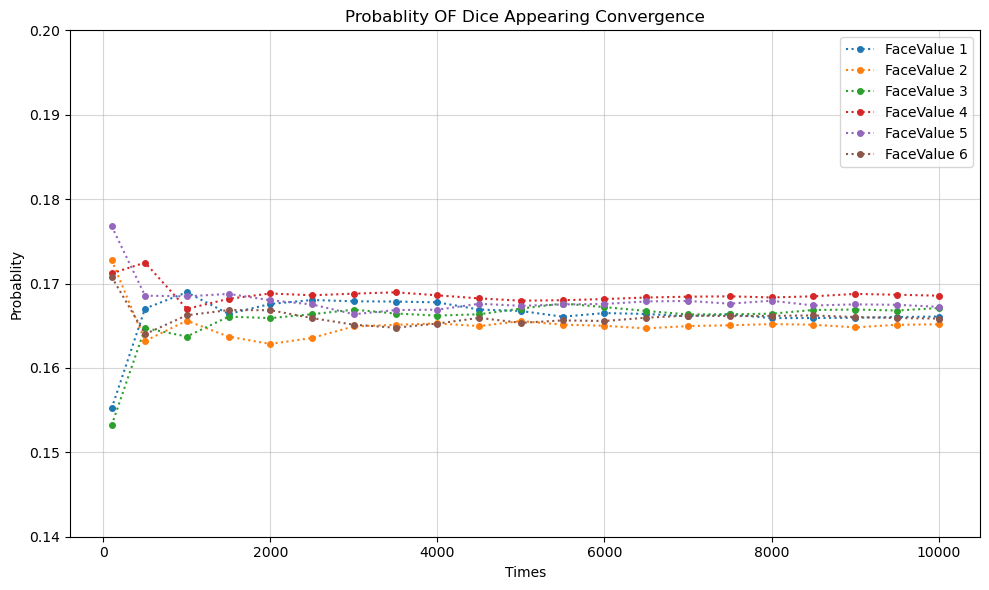

In [369]:
dice  = pd.DataFrame(dice_convergence)
dice = dice.div(dice.sum(axis=1), axis=0)
dice.columns = ['FaceValue 1', 'FaceValue 2', 'FaceValue 3', 'FaceValue 4', 'FaceValue 5', 'FaceValue 6']
dice = dice[((dice.index + 1) % 500  == 0) | (dice.index + 1 == 100)]
plt.figure(figsize=(10, 6))
for col in dice.columns:
    plt.plot(dice.index + 1, dice[col], marker='o', linestyle=':', markersize=4, label=f'{col}')
plt.xlabel('Times')
plt.ylabel('Probablity')
plt.ylim(0.14, 0.2)
plt.title('Probablity OF Dice Appearing Convergence')
plt.legend()
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

### As the number of trials increases, the times of each player winning converges to the same.

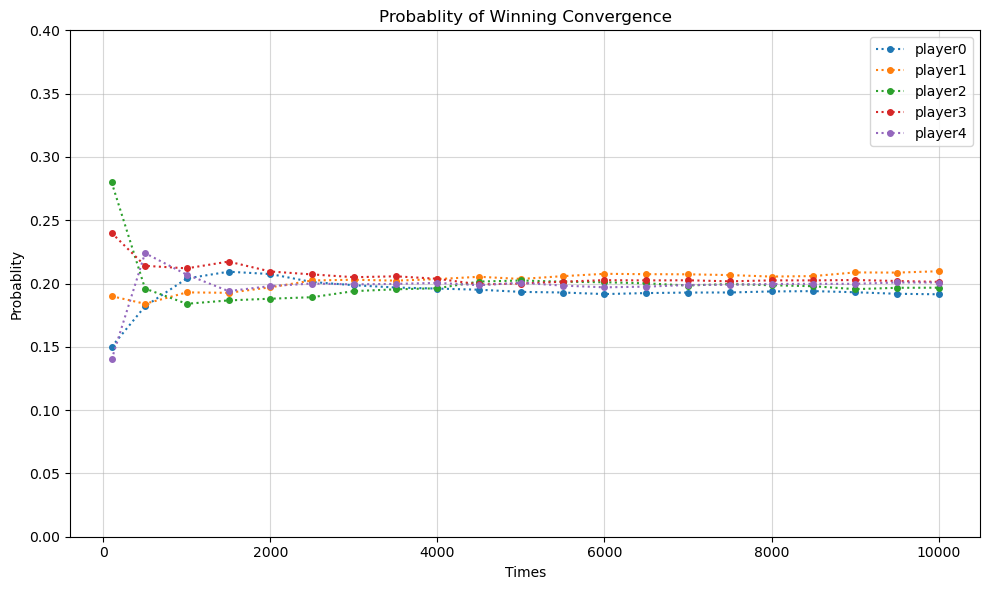

In [374]:
winners  = pd.DataFrame(winner_convergence)
winners = winners.div(winners.sum(axis=1), axis=0)
winners = winners[((winners.index + 1) % 500  == 0) | (winners.index + 1 == 100)]
plt.figure(figsize=(10, 6))
for col in winners.columns:
    plt.plot(winners.index + 1, winners[col], marker='o', linestyle=':', markersize=4, label=f'{col}')
plt.xlabel('Times')
plt.ylabel('Probablity')
plt.ylim(0, 0.4)
plt.title('Probablity of Winning Convergence')
plt.legend()
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

### The dice quantity distribution should be a normal distribution,and it is proved.

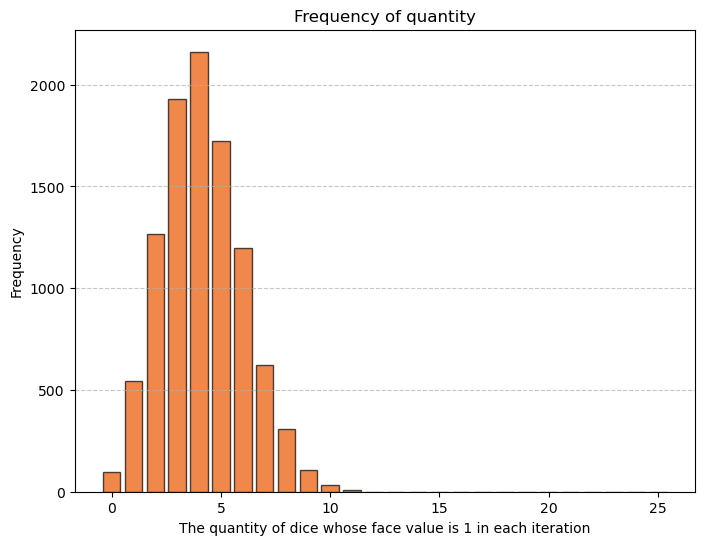

In [379]:
quantity = list(validation_test.max_quantity.keys())
frequency = list(validation_test.max_quantity.values())
plt.figure(figsize=(8, 6))
plt.bar(quantity, frequency, color='#eb5600', edgecolor='black', alpha=0.7)
plt.title("Frequency of quantity")
plt.xlabel("The quantity of dice whose face value is 1 in each iteration")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### The dice distribution should be a uniform distribution, and it is also verified.

In [8]:
#check 
print("dice distribution")
validation_test.check_original_dices()

dice distribution


,Face_value,Occurrence,Occurrence rate
0,1,41641,16.66%
1,2,41804,16.72%
2,3,41739,16.70%
3,4,41563,16.63%
4,5,41468,16.59%
5,6,41785,16.71%


#### The Challenge bid distribution should be randomly.
##### Players is likely to challenge when the quantity of bid is small, but almost randomly. 
##### It is reasonable that players never challenge when the quantity is smaller than 10% of total dice because the first bid should be bigger than that under game rule
##### The valid rate increases as the quantity of bid raises, as expected.


    quantity  face_value  times  valid_times  invalid_times
65       1.0           6    691          691              0
29       0.4           6    292          173            119
16       0.2           5    251            9            242
28       0.4           5    249          125            124
35       0.5           6    240          200             40
..       ...         ...    ...          ...            ...
4        0.0           5      0            0              0
11       0.1           6      0            0              0
10       0.1           5      0            0              0
9        0.1           4      0            0              0
0        0.0           1      0            0              0

[66 rows x 5 columns]


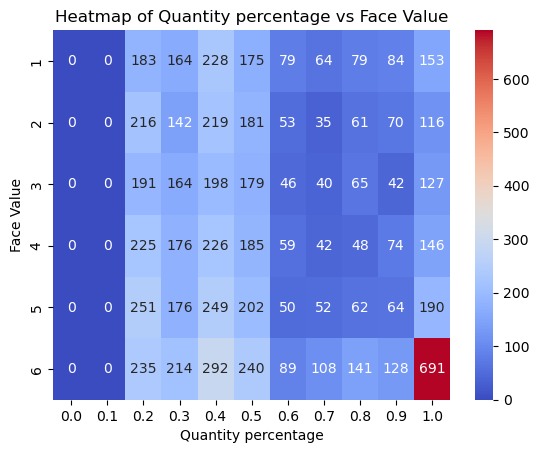

In [10]:
validation_test.check_liar_call(0)

          times  valid_times  invalid_times  valid_rate
quantity                                               
0.0           0            0              0         NaN
0.1           0            0              0         NaN
0.2        1301          146           1155    0.112221
0.3        1036          328            708    0.316602
0.4        1412          873            539    0.618272
0.5        1162          991            171    0.852840
0.6         376          366             10    0.973404
0.7         341          340              1    0.997067
0.8         456          455              1    0.997807
0.9         462          462              0    1.000000
1.0        1423         1423              0    1.000000


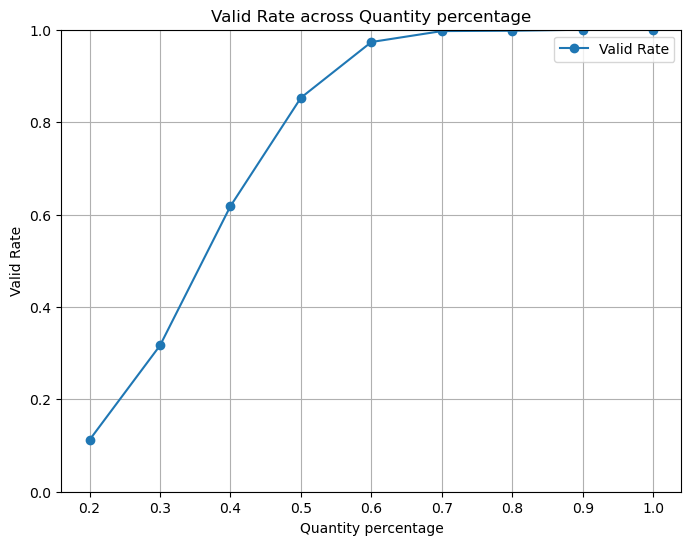

In [11]:
validation_test.check_liar_valid_rate(0)

#### The Start Rate Distribution is  a  Uniform Distribution as expected

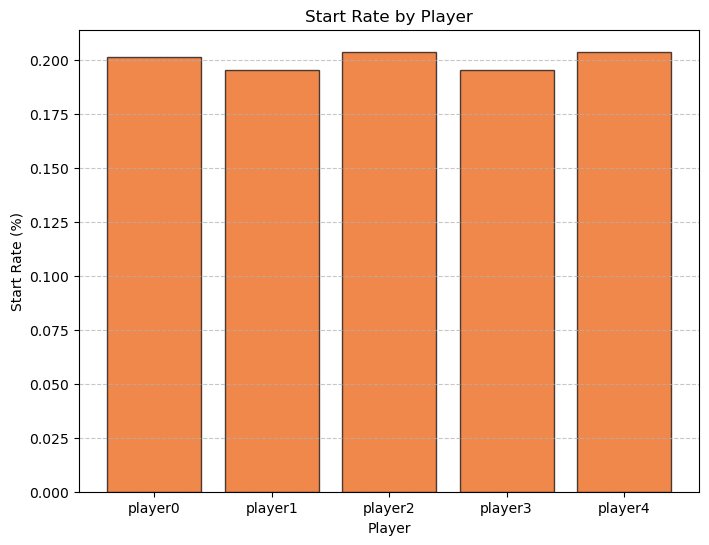

In [13]:
df = validation_test.check_first_player()
df
plt.figure(figsize=(8, 6))
plt.bar(df["Player"], df["Start rate"], color='#eb5600', edgecolor='black', alpha=0.7)
plt.title("Start Rate by Player")
plt.xlabel("Player")
plt.ylabel("Start Rate (%)")
plt.ylim(ymin = 0.00 )
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### The Win Rate Distribution  is  a Uniform Distribution as expected 

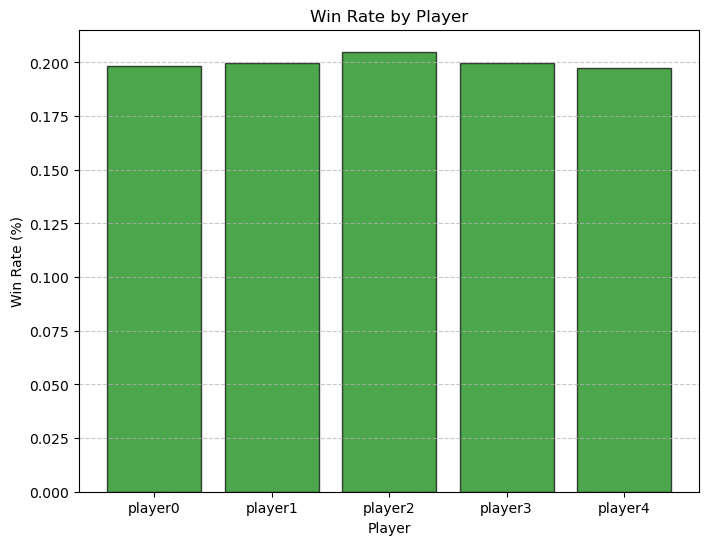

In [15]:
result_df = validation_test.check_win_rate()
result_df
plt.figure(figsize=(8, 6))
plt.bar(result_df["Player"], result_df["Win Rate"], color='green', edgecolor='black', alpha=0.7)
plt.title("Win Rate by Player")
plt.xlabel("Player")
plt.ylabel("Win Rate (%)")
plt.ylim(ymin = 0.00 )
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### EXPERIMENT

#### 1. Test for the First-Caller Hypothesis:

##### The First-Caller Advantage Hypothesis suggests that when the probability distribution of dice combinations aligns with statistical expectations, the player who initiates the bidding (the first caller) tends to have a higher win rate compared to their opponents.
##### Expected result : The player choose to bid first(player0)  would have a higher win rate than other players
##### Actual result :  ❌
##### Contrary to the hypothesis, the next player in sequence (Player1) shows a significantly lower win rate compared to others.  Player1 is at a disadvantage maybe because they must directly respond to the first bid, often with limited options. This position forces riskier decisions, leading to lower win rates.



In [18]:
# Simulate the game with 5 players and each player has 5 dice (everyone uses random strategies,but the first player always bid first)
num_players = 5
num_dice = 5
times = 10000
validation_test = valid.Validation_varaibales(num_players,num_dice,times)
Strategies = {}
for i in range(num_players):
    Strategies[i] = stra.Strategy()
for _ in range(times):
    winner, first_player, bid_record, liar_record, bid_times,original_dices = game.simulate_game(num_players, num_dice, Strategies, first_caller = 0)
    validation_test.update(winner, first_player, bid_record, liar_record, bid_times, original_dices)

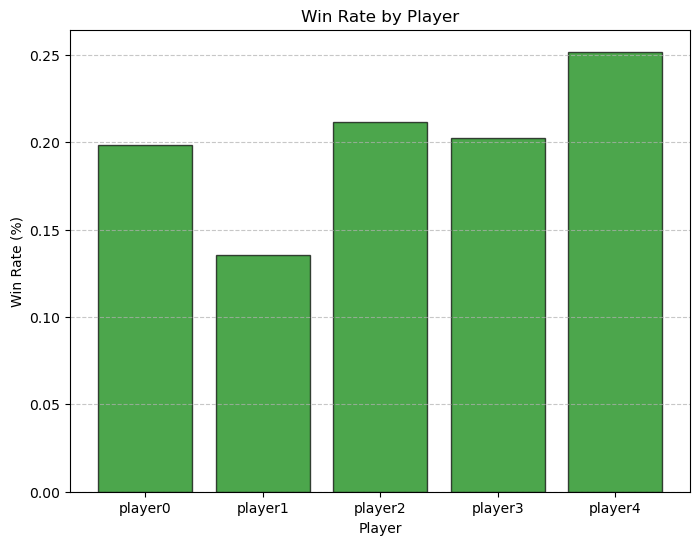

In [19]:
result_df = validation_test.check_win_rate()
result_df 
plt.figure(figsize=(8, 6))
plt.bar(result_df["Player"], result_df["Win Rate"], color='green', edgecolor='black', alpha=0.7)
plt.title("Win Rate by Player")
plt.xlabel("Player")
plt.ylabel("Win Rate (%)")
plt.ylim(ymin = 0.00 )
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

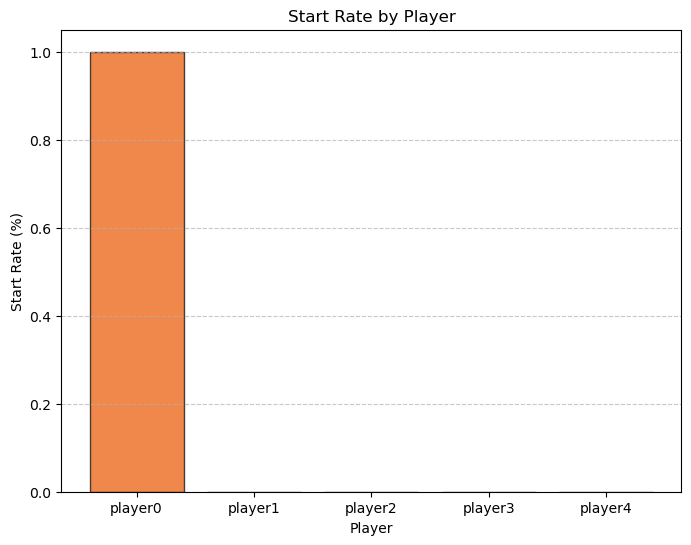

In [20]:
start_rate_df = validation_test.check_first_player()
plt.figure(figsize=(8, 6))
plt.bar(start_rate_df["Player"], start_rate_df["Start rate"], color='#eb5600', edgecolor='black', alpha=0.7)
plt.title("Start Rate by Player")
plt.xlabel("Player")
plt.ylabel("Start Rate (%)")
plt.ylim(ymin = 0.00 )
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


#### 2. Test Hypothesis for different Threshold-Based Strategy

##### Hyposhesis: using certain thresholds to decide when to challenge  has a higher win rate than players who challenge randomly.
##### Normal Threshold: 50% of the total number of dice in play.
##### Optimal Threshold: based on a calculated probability ratio that accounts for the total dice and the player’s own dice. ( number of dice with the bid face value in own dice + 50% of the number of remaining dice)
##### Expected result:  Players using certain thresholds to decide when to challenge have higer  win rate than players who challenge randomly.
##### Actual result : ✅ As Expected. 
##### Players using the "Threshold" strategy showed higher win rates compared to those challenge randomly. 


In [22]:
# Simulate the game with 5 players and each player has 5 dice (some players use random strategies and one uses normal_threshold strategy)
num_players = 5
num_dice = 5
times = 10000  
validation_test = valid.Validation_varaibales(num_players,num_dice,times)
Strategies = {}
for i in range(num_players):
    if i == 0:
        Strategies[i] = stra.Strategy(liar_threshold = "Normal")
    elif i == 1:
        Strategies[i] = stra.Strategy(liar_threshold = "Optimal")
    elif i == 2:
        Strategies[i] = stra.Strategy(liar_threshold = "Random")
    else:
        Strategies[i] = stra.Strategy()
for _ in range(times):
    winner, first_player, bid_record, liar_record, bid_times,original_dices = game.simulate_game(num_players, num_dice, Strategies, first_caller = -1, special_rule = False)
    validation_test.update(winner, first_player, bid_record, liar_record, bid_times, original_dices)

In [23]:
validation_test.check_win_rate()

,Player,Wins,Win Rate
0,player0,2141,0.2141
1,player1,3865,0.3865
2,player2,1411,0.1411
3,player3,1294,0.1294
4,player4,1289,0.1289


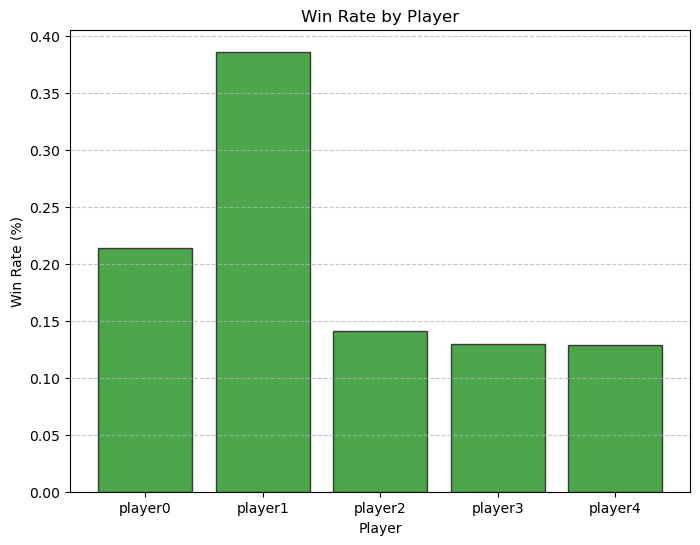

In [24]:
result_df = validation_test.check_win_rate()
result_df 
plt.figure(figsize=(8, 6))
plt.bar(result_df["Player"], result_df["Win Rate"], color='green', edgecolor='black', alpha=0.7)
plt.title("Win Rate by Player")
plt.xlabel("Player")
plt.ylabel("Win Rate (%)")
plt.ylim(ymin = 0.00 )
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Hypothsis Validaion 
##### Expected challenge bid distribution:  
##### ✅The player using normal_threshold strategy would not challenge if  the quantity is smaller than 50% of total dice; 
##### ✅The player using optimal_threshold stratgey  would show less challenges than random player if the quantity is small 

    quantity  face_value  times  valid_times  invalid_times
65       1.0           6    790          790              0
64       1.0           5    415          415              0
60       1.0           1    378          378              0
53       0.8           6    332          332              0
63       1.0           4    330          330              0
..       ...         ...    ...          ...            ...
12       0.2           1      0            0              0
14       0.2           3      0            0              0
15       0.2           4      0            0              0
8        0.1           3      0            0              0
0        0.0           1      0            0              0

[66 rows x 5 columns]


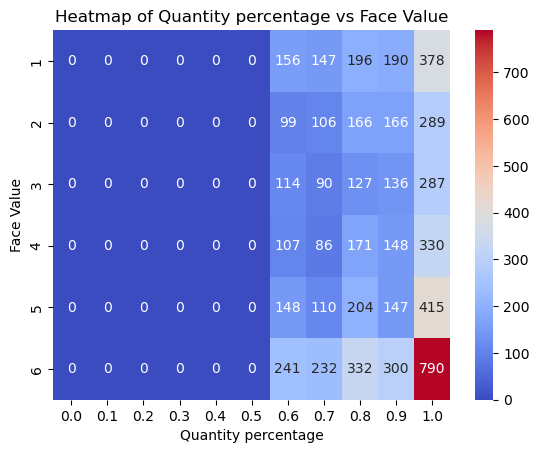

In [26]:
#playee with normal_threshold stratagy
validation_test.check_liar_call(0)

    quantity  face_value  times  valid_times  invalid_times
65       1.0           6    472          472              0
35       0.5           6    414          377             37
30       0.5           1    387          385              2
53       0.8           6    381          381              0
60       1.0           1    378          378              0
..       ...         ...    ...          ...            ...
13       0.2           2      0            0              0
14       0.2           3      0            0              0
15       0.2           4      0            0              0
16       0.2           5      0            0              0
0        0.0           1      0            0              0

[66 rows x 5 columns]


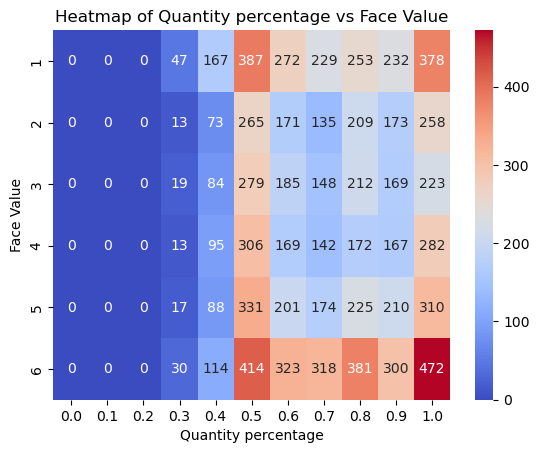

In [27]:
#playee with Optimal_threshold stratagy
validation_test.check_liar_call(1)

    quantity  face_value  times  valid_times  invalid_times
29       0.4           6    413          241            172
35       0.5           6    301          256             45
17       0.2           6    301           18            283
28       0.4           5    286          166            120
65       1.0           6    281          281              0
..       ...         ...    ...          ...            ...
5        0.0           6      0            0              0
11       0.1           6      0            0              0
10       0.1           5      0            0              0
9        0.1           4      0            0              0
0        0.0           1      0            0              0

[66 rows x 5 columns]


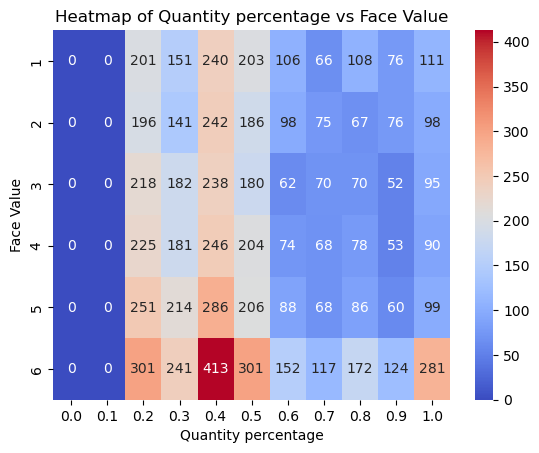

In [28]:
#player with Rnadom stratagy
validation_test.check_liar_call(2)

#### Expected challenge valid rate : 
##### ✅Players using specific strategies are expected to have a higher challenge valid rate than random strategies.

          times  valid_times  invalid_times  valid_rate
quantity                                               
0.0           0            0              0         NaN
0.1           0            0              0         NaN
0.2           0            0              0         NaN
0.3           0            0              0         NaN
0.4           0            0              0         NaN
0.5           0            0              0         NaN
0.6         865          827             38    0.956069
0.7         771          762              9    0.988327
0.8        1196         1194              2    0.998328
0.9        1087         1087              0    1.000000
1.0        2489         2489              0    1.000000


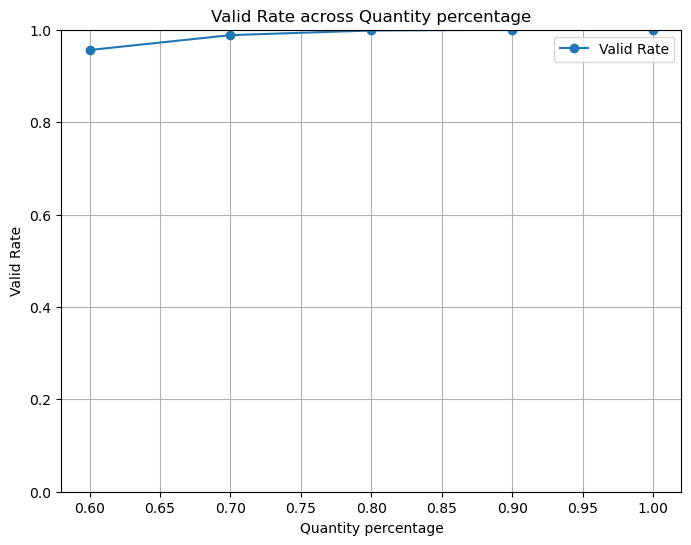

In [30]:
# playee with normal_threshold stratagy
validation_test.check_liar_valid_rate(0)

          times  valid_times  invalid_times  valid_rate
quantity                                               
0.0           0            0              0         NaN
0.1           0            0              0         NaN
0.2           0            0              0         NaN
0.3         139          108             31    0.776978
0.4         621          549             72    0.884058
0.5        1982         1847            135    0.931887
0.6        1321         1291             30    0.977290
0.7        1146         1142              4    0.996510
0.8        1452         1452              0    1.000000
0.9        1251         1251              0    1.000000
1.0        1923         1923              0    1.000000


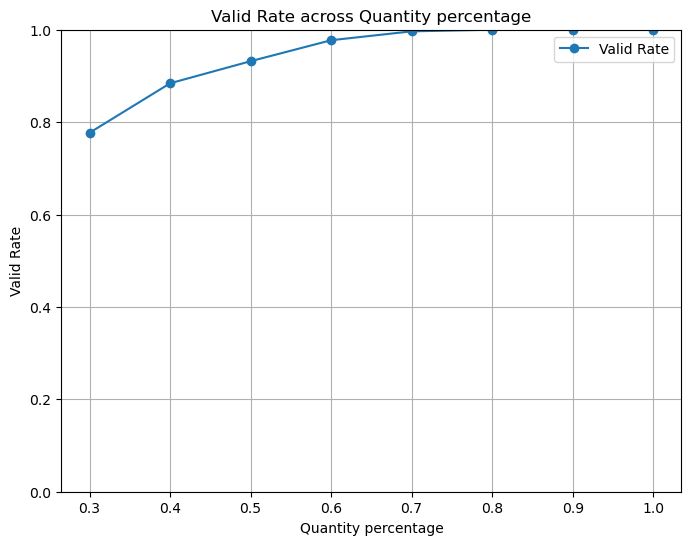

In [31]:
##player with Optimal_threshold stratagy
validation_test.check_liar_valid_rate(1)

          times  valid_times  invalid_times  valid_rate
quantity                                               
0.0           0            0              0         NaN
0.1           0            0              0         NaN
0.2        1392          164           1228    0.117816
0.3        1110          365            745    0.328829
0.4        1665         1021            644    0.613213
0.5        1280         1130            150    0.882812
0.6         580          561             19    0.967241
0.7         464          460              4    0.991379
0.8         581          581              0    1.000000
0.9         441          441              0    1.000000
1.0         774          774              0    1.000000


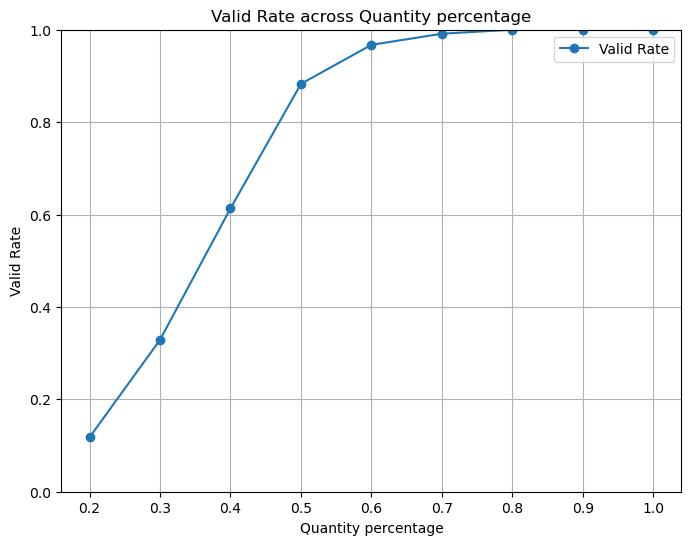

In [32]:
#player with Rnadom stratagy
validation_test.check_liar_valid_rate(2)

In [33]:
validation_test.check_liar_win_rate()

,player,valid_calls,invalid_calls,total_calls,valid_call_rate
0,player0,6359,49,6408,99.24%
1,player1,9563,272,9835,97.23%
2,player2,5497,2790,8287,66.33%
3,player3,5177,2512,7689,67.33%
4,player4,5206,2575,7781,66.91%


### 3. Test Hypothesis for Prefer-Bid Strategy
The Prefer-Bid Hypothesis suggests that a player who prioritizes bidding using the face value of the dice they hold in the highest quantity will outperform opponents using random strategies. This hypothesis assumes that leveraging personal dice knowledge provides a statistical advantage in the game.

In [35]:
# Simulate the game with 5 players and each player has 5 dice (some players use random strategies and one uses prefer_bid strategy)
num_players = 5
num_dice = 5
times = 10000  
validation_test = valid.Validation_varaibales(num_players,num_dice,times)
Strategies = {}
for i in range(num_players):
    if i == 0:
        Strategies[i] = stra.Strategy(prefer_bid = True)
    else:
        Strategies[i] = stra.Strategy()
for _ in range(times):
    winner, first_player, bid_record, liar_record, bid_times,original_dices = game.simulate_game(num_players, num_dice, Strategies, first_caller = -1, special_rule = False)
    validation_test.update(winner, first_player, bid_record, liar_record, bid_times, original_dices)

In [36]:
result_df = validation_test.check_win_rate()
result_df 

,Player,Wins,Win Rate
0,player0,333,0.333
1,player1,153,0.153
2,player2,172,0.172
3,player3,186,0.186
4,player4,156,0.156


#### 4.Test for different strtegies
##### For Hypothesis 4, we examined whether players who com
bine threshold strategies with the preferred dice bid strategy achieve the highest win rates.
##### Expected result : Players who combine thresholds with preferred dice bid achieve the highest win rates.
##### Actual result : ✅ As Expected. Players using the preferred dice bid strategy combining with optimal threshold showed the highest win rates compared to those used other strategies.

In [38]:
# Simulate the game with 5 players and each player has 5 dice
num_players = 5
num_dice = 5
times = 10000  
validation_test = valid.Validation_varaibales(num_players,num_dice,times)
Strategies = {}
for i in range(num_players):
    if i == 0:
        Strategies[i] = stra.Strategy(liar_threshold = "Normal")
    elif i == 1:
        Strategies[i] = stra.Strategy(liar_threshold = "Optimal")
    elif i == 2:
        Strategies[i] = stra.Strategy(prefer_bid = True)
    elif i == 3:
        Strategies[i] = stra.Strategy(liar_threshold = "Normal",prefer_bid = True)
    elif i == 4:
        Strategies[i] = stra.Strategy(liar_threshold = "Optimal",prefer_bid = True)
for _ in range(times):
    winner, first_player, bid_record, liar_record, bid_times,original_dices = game.simulate_game(num_players, num_dice, Strategies, first_caller = -1, special_rule = False)
    validation_test.update(winner, first_player, bid_record, liar_record, bid_times, original_dices)

In [39]:
result_df = validation_test.check_win_rate()
result_df 

,Player,Wins,Win Rate
0,player0,792,0.0792
1,player1,1668,0.1668
2,player2,806,0.0806
3,player3,2758,0.2758
4,player4,3976,0.3976


#### Test for Hypothesis 5 
##### For Hypothesis 5, we tested the impact of modifying the rule. Instead of eliminating a player after a failed challenge, they lose one die. We hypothesized that this adjustment would affect game fairness and the win rate distribution among players.
##### Expected result : Modifying the rule (reducing one die instead of eliminating a player if a challenge happens) affects game fairness and the win rate of players.
##### Actual result : ✅ As Expected.   The win rate of different strategies changes,  and the “good” strategies performs better , the “bad” strategies performs worse under special rule than under normal rule. 

In [41]:
# Simulate the game with 5 players and each player has 5 dice
num_players = 5
num_dice = 5
times = 10000  
validation_test = valid.Validation_varaibales(num_players,num_dice,times)
Strategies = {}
for i in range(num_players):
    if i == 0:
        Strategies[i] = stra.Strategy(liar_threshold = "Normal",prefer_bid = True)
    elif i == 1:
        Strategies[i] = stra.Strategy(prefer_bid = True)
    elif i == 2:
        Strategies[i] = stra.Strategy(liar_threshold = "Optimal")
    elif i == 3:
        Strategies[i] = stra.Strategy(liar_threshold = "Optimal",prefer_bid = True)
    elif i == 4:
        Strategies[i] = stra.Strategy(liar_threshold = "Normal")
for _ in range(times):
    winner, first_player, bid_record, liar_record, bid_times,original_dices = game.simulate_game(num_players, num_dice, Strategies, first_caller = -1, special_rule = True)
    validation_test.update(winner, first_player, bid_record, liar_record, bid_times, original_dices)

In [42]:
validation_test.check_win_rate()

,Player,Wins,Win Rate
0,player0,4790,0.4790
1,player1,308,0.0308
2,player2,356,0.0356
3,player3,4066,0.4066
4,player4,480,0.0480


### 6. Test for Conservative Increase Strategy
The Conservative Increase Hypothesis posits that a player who adopts a strategy of only incrementing the bid quantity by 1 per turn, rather than making larger or random increases, will achieve a higher success rate in the game. This approach reduces risk while maintaining competitive bids, potentially leading to a more consistent game outcome.

In [44]:
# Simulate the game with 5 players and each player has 5 dice (some players use random strategies and one uses conservative_increase strategy)
num_players = 5
num_dice = 5
times = 1000  
validation_test = valid.Validation_varaibales(num_players,num_dice,times)
Strategies = {}
for i in range(num_players):
    if i == 0:
        Strategies[i] = stra.Strategy(conservative_increase = True)
    else:
        Strategies[i] = stra.Strategy()
for _ in range(times):
    winner, first_player, bid_record, liar_record, bid_times,original_dices = game.simulate_game(num_players, num_dice, Strategies, first_caller = -1, special_rule = False)
    validation_test.update(winner, first_player, bid_record, liar_record, bid_times, original_dices)

dice distribution
   Face_value  Occurrence Occurrence rate
0           1        4157          16.63%
1           2        4258          17.03%
2           3        4062          16.25%
3           4        4193          16.77%
4           5        4116          16.46%
5           6        4214          16.86%



win rate distribution
None
    Player  Wins  Win Rate
0  player0   253     0.253
1  player1   151     0.151
2  player2   182     0.182
3  player3   213     0.213
4  player4   201     0.201



first player distribution
    Player  Start times  Start rate
0  player0          194       0.194
1  player1          184       0.184
2  player2          208       0.208
3  player3          215       0.215
4  player4          199       0.199



challenge bid distribution for player0
    quantity  face_value  times  valid_times  invalid_times
65       1.0           6     61           61              0
27       0.4           4     37           23             14
29       0.4           6     

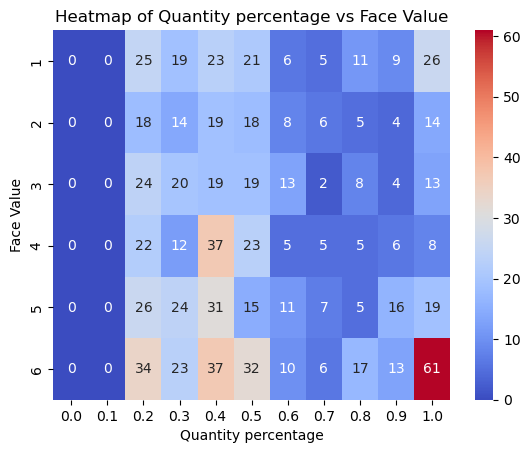




challenge bid distribution for player1
    quantity  face_value  times  valid_times  invalid_times
65       1.0           6     38           38              0
17       0.2           6     37            1             36
29       0.4           6     36           13             23
28       0.4           5     33           18             15
26       0.4           3     31           13             18
..       ...         ...    ...          ...            ...
9        0.1           4      0            0              0
10       0.1           5      0            0              0
11       0.1           6      0            0              0
56       0.9           3      0            0              0
0        0.0           1      0            0              0

[66 rows x 5 columns]


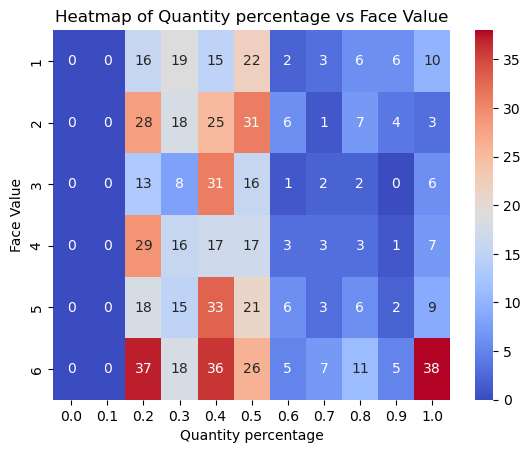

liar valid rate for player0
          times  valid_times  invalid_times  valid_rate
quantity                                               
0.0           0            0              0         NaN
0.1           0            0              0         NaN
0.2         149           17            132    0.114094
0.3         112           44             68    0.392857
0.4         166          101             65    0.608434
0.5         128          114             14    0.890625
0.6          53           49              4    0.924528
0.7          31           31              0    1.000000
0.8          51           51              0    1.000000
0.9          52           52              0    1.000000
1.0         141          141              0    1.000000


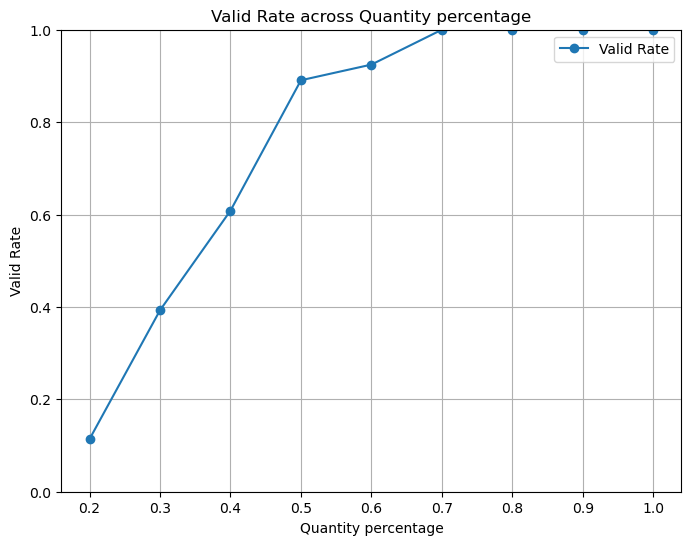




liar valid rate for player1
          times  valid_times  invalid_times  valid_rate
quantity                                               
0.0           0            0              0         NaN
0.1           0            0              0         NaN
0.2         141           15            126    0.106383
0.3          94           26             68    0.276596
0.4         157           82             75    0.522293
0.5         133          111             22    0.834586
0.6          23           22              1    0.956522
0.7          19           19              0    1.000000
0.8          35           35              0    1.000000
0.9          18           18              0    1.000000
1.0          73           73              0    1.000000


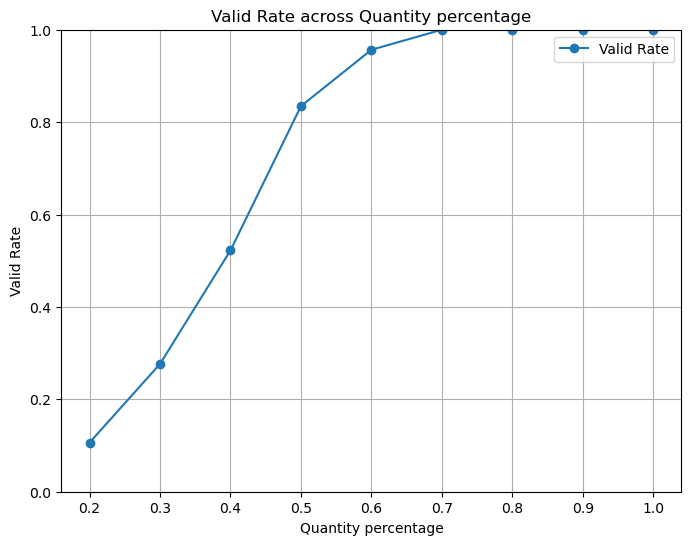

valid_call_rate


,player,valid_calls,invalid_calls,total_calls,valid_call_rate
0,player0,600,283,883,67.95%
1,player1,401,292,693,57.86%
2,player2,536,286,822,65.21%
3,player3,532,269,801,66.42%
4,player4,517,284,801,64.54%


In [45]:
#check 
print("dice distribution")
print(validation_test.check_original_dices())
print("\n" * 2)
print(print("win rate distribution"))
print(validation_test.check_win_rate())
print("\n" * 2)
print("first player distribution")
print(validation_test.check_first_player())
print("\n" * 2)
print("challenge bid distribution for player0")
validation_test.check_liar_call(0)
print("\n" * 2)
print("challenge bid distribution for player1")
validation_test.check_liar_call(1)
print("liar valid rate for player0")
validation_test.check_liar_valid_rate(0)
print("\n" * 2)
print("liar valid rate for player1")
validation_test.check_liar_valid_rate(1)
print("valid_call_rate")
validation_test.check_liar_win_rate()

7. Test for Prefer-Bid Using Conservative Increase Strategy
The Prefer-Bid with Conservative Increase Hypothesis posits that a player who use prefer_bid strategy and increases bid quantity conservatively (e.g., by only adding 1 to the previous quantity per turn instead of random increases) will outperform opponents using random strategies. This strategy focuses on controlled bidding to minimize unnecessary risks while leveraging known dice probabilities.

In [47]:
# Simulate the game with 5 players and each player has 5 dice (some players use random strategies and one uses prefer_bid and conservative_increase strategy)
num_players = 5
num_dice = 5
times = 1000  
validation_test = valid.Validation_varaibales(num_players,num_dice,times)
Strategies = {}
for i in range(num_players):
    if i == 0:
        Strategies[i] = stra.Strategy(prefer_bid =  True, conservative_increase = True)
    else:
        Strategies[i] = stra.Strategy()
for _ in range(times):
    winner, first_player, bid_record, liar_record, bid_times,original_dices = game.simulate_game(num_players, num_dice, Strategies, first_caller = -1, special_rule = False)
    validation_test.update(winner, first_player, bid_record, liar_record, bid_times, original_dices)

In [48]:
# Simulate the game with 5 players and each player has 5 dice (some players use random strategies and one uses prefer_bid and conservative_increase strategy)
num_players = 5
num_dice = 5
times = 1000  
validation_test = valid.Validation_varaibales(num_players,num_dice,times)
Strategies = {}
for i in range(num_players):
    if i == 0:
        Strategies[i] = stra.Strategy(prefer_bid =  True, conservative_increase = True)
    else:
        Strategies[i] = stra.Strategy()
for _ in range(times):
    winner, first_player, bid_record, liar_record, bid_times,original_dices = game.simulate_game(num_players, num_dice, Strategies, first_caller = -1, special_rule = False)
    validation_test.update(winner, first_player, bid_record, liar_record, bid_times, original_dices)